<a href="https://colab.research.google.com/github/daiangan/udea_variable_stars/blob/main/variable_stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Tipos y distribución estadística de estrellas variables.

Datos extraídos de:
https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=B/gcvs/gcvs_cat

Las categorías fueron extraídas de:
http://cdsarc.u-strasbg.fr/viz-bin/getCatFile_Redirect/?-plus=-%2b&B/gcvs/./vartype.txt
"""

In [ ]:
!pip install pandas

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv("variable_stars_VizieR.tsv", delimiter="|")

df = df.dropna(subset=['VarType'])

df.head()

,GCVS,n_GCVS,RAJ2000,DEJ2000,VarType,magMax,Period,SpType,Exists,VarName,Simbad
0,,,h:m:s,d:m:s,,mag,d,,,,NaN
1,T And,x,00 22 23.15,+26 59 45.8,M,7.700,281.0000000000,M4e-M7.5e,,T And,Simbad
2,U And,x,01 15 29.70,+40 43 08.4,M,9.000,347.7000000000,M6e,,U And,Simbad
3,V And,x,00 50 06.28,+35 39 10.1,M,9.000,256.4000000000,M2e-M3e,,V And,Simbad
4,W And,*,02 17 32.96,+44 18 17.8,M,6.700,397.3000000000,"S6,1e-S9,2e",,W And,Simbad


In [19]:
df.VarType

0                  
1        M         
2        M         
3        M         
4        M         
            ...    
58196    SRB       
58197    RRC       
58198    SRB       
58199    SRB       
58200    NB:       
Name: VarType, Length: 58201, dtype: object

In [20]:
df['VarType'] = df['VarType'].str.strip()

In [36]:
star_types_counter = df.groupby('VarType').size().reset_index(name='Count')
print(star_types_counter)

       VarType  Count
0                 559
1            *     91
2          ACV    335
3    ACV+DSCT:      1
4    ACV+DSCTC      1
..         ...    ...
536        ZZ:      2
537        ZZA     39
538        ZZB      9
539       ZZB:      1
540        ZZO     10

[541 rows x 2 columns]


In [ ]:
!pip install plotly

In [23]:
import plotly.express as px

In [24]:
fig = px.histogram(df['VarType'])

fig.show()

In [25]:
"""
1. Eruptive Variable Stars

Eruptive variables are stars varying in brightness because of
violent processes and flares occurring in their chromospheres
and coronae. The light changes are usually accompanied by shell
events or mass outflow in the form of stellar winds of variable
intensity and/or by interaction with the surrounding interstellar
medium. This class includes the following types:
"""

star_types = {
  "FU": "Orion variables of the FU Orionis type. Characterized by gradual increases in brightness by about 6 mag in several months, followed by either almost complete constancy at maximum that is sustained for long periods of time or slow decline by 1-2 mag. Spectral types at maximum are in the range Ae(alpha) - Gpe(alpha). After an outburst, a gradual development of an emission spectrum is observed and the spectral type becomes later. These variables probably mark one of the evolutionary stages of T Tauri-type Orion variables (INT), as evidenced by an outburst of one member, V1057 Cyg, but its decline (2.5 mag in 11 years) commenced immediately after maximum brightness was attained. All presently known FU Ori variables are coupled with reflecting cometary nebulae.",
  "GCAS": "Eruptive irregular variables of the Gamma Cas type. These are rapidly rotating B III-IVe stars with mass outflow from their equatorial zones. The formation of equatorial rings or disks is often accompanied by temporary fading. Light amplitudes may reach 1.5 mag in V.",
  "I": "Poorly studied irregular variables with unknown features of light variations and spectral types. This is a very inhomogeneous group of objects.",
  "IA": "Poorly studied irregular variables of early (O-A) spectral type.",
  "IB": "Poorly studied irregular variables of intermediate (F-G) to late (K-M) spectral type.",
  "IN": "Orion variables. Irregular, eruptive variables connected with bright or dark diffuse nebulae or observed in the regions of these nebulae. Some of them may show cyclic light variations caused by axial rotation. In the Spectrum-Luminosity diagram, they are found in the area of the main sequence and subgiants. They are probably young objects that, during the course of further evolution, will become light-constant stars on the zero-age main sequence (ZAMS). The range of brightness variations may reach several magnitudes. In the case of rapid light variations having been observed (up to 1 mag in 1-10 days), the letter \"S\" is added to the symbol for the type (INS). This type may be divided into the following subtypes:",
  "INA": "Orion variables of early spectral types (B-A or Ae). They are often characterized by occasional abrupt Algol-like fadings (T Ori);",
  "INB": "Orion variables of intermediate and late spectral types, F-M or Fe-Me (BH Cep, AH Ori). F-type stars may show Algol-like fadings similar to those of many INA stars; K-M stars may produce flares along with irregular light variations;",
  "INT": "Orion variables of the T Tauri type. Stars are assigned to this type on the basis of the following (purely spectroscopic) criteria: spectral types are in the range Fe-Me. The spectra of most typical stars resemble the spectrum of the solar chromosphere. The feature specific to the type is the presence of the fluorescent emission lines Fe II 4046, 4132 A (anomalously intense in the spectra of these stars), emission lines [Si II] and [O I], as well as the absorption line Li I 6707 A. These variables are usually observed only in diffuse nebulae. If it is not apparent that the star is associated with a nebula, the letter \"N\" in the symbol for the type may be omitted, e.g., IT (RW AUR);",
  "IN(YY)": "Some Orion variables (YY Ori) show the presence of absorption components on the redward sides of emission lines, indicating the infall of matter toward the stars' surfaces. In such cases, the symbol for the type may be accompanied by the symbol \"YY\".",
  "IS": "Rapid irregular variables having no apparent connection with diffuse nebulae and showing light changes of about 0.5 - 1.0 mag within several hours or days. There is no strict boundary between rapid irregular and Orion variables. If a rapid irregular star is observed in the region of a diffuse nebula, it is considered an Orion variable and designated by the symbol INS. To attribute a variable to the IS type, it is necessary to take much care to be certain that its light changes are really not periodic. Quite a number of the stars assigned to this type in the third edition of the GCVS turned out to be eclipsing binary systems, RR Lyrae variables, and even extragalactic BL Lac objects.",
  "ISA": "Rapid irregular variables of the early spectral types, B-A or Ae;",
  "ISB": "Rapid irregular variables of the intermediate and late spectral types, F-M and Fe-Me.",
  "RCB": "Variables of the R Coronae Borealis type. These are hydrogen-poor, carbon- and helium-rich, high-luminosity stars belonging to the spectral types Bpe-R, which are simultaneously eruptive and pulsating variables. They show slow nonperiodic fadings by 1-9 mag in V lasting from a month or more to several hundred days. These changes are superposed on cyclic pulsations with amplitudes up to several tenths of a magnitude and periods in the range 30-100 days.",
  "RS": "Eruptive variables of the RS Canum Venaticorum type. This type is ascribed to close binary systems with spectra showing Ca II H and K in emission, their components having enhanced chromospheric activity that causes quasi-periodic light variability. The period of variation is close to the orbital one, and the variability amplitude is usually as great as 0.2 mag in V (UX Ari). They are X-ray sources and rotating variables. RS CVn itself is also an eclipsing system (see below).",
  "SDOR": "Variables of the S Doradus type. These are eruptive, high-luminosity Bpec-Fpec stars showing irregular (sometimes cyclic) light changes with amplitudes in the range 1-7 mag in V. They belong to the brightest blue stars of their parent galaxies. As a rule, these stars are connected with diffuse nebulae and surrounded by expanding envelopes (P Cyg, Eta Car).",
  "UV": "Eruptive variables of the UV Ceti type, these are K Ve-M Ve stars sometimes displaying flare activity with amplitudes from several tenths of a magnitude up to 6 mag in V. The amplitude is considerably greater in the ultraviolet spectral region. Maximum light is attained in several seconds or dozens of seconds after the beginning of a flare; the star returns to its normal brightness in several minutes or dozens of minutes.",
  "UVN": "Flaring Orion variables of spectral types Ke-Me. These are phenomenologically almost identical to UV Cet variables observed in the solar neighborhood. In addition to being related to nebulae, they are normally characterized by being of earlier spectral type and greater luminosity, with slower development of flares (V389 Ori). They are possibly a specific subgroup of INB variables with irregular variations superimposed by flares.",
  "WR": "Eruptive Wolf-Rayet variables. Stars with broad emission features of He I and He II as well as C II-C IV, O II-O IV, and N III-N V. They display irregular light changes with amplitudes up to 0.1 mag in V, which are probably caused by physical processes, in particular, by nonstable mass outflow from their atmospheres."
}

filtered_df = df[df['VarType'].isin(star_types)]

fig = px.histogram(filtered_df, x='VarType')

fig.show()


In [26]:
"""
2. Pulsating Variable Stars

Pulsating variables are stars showing periodic expansion and
contraction of their surface layers. The pulsations may be radial
or nonradial. A radially pulsating star remains spherical in
shape, while in the case of nonradial pulsations the star's shape
periodically deviates from a sphere, and even neighboring zones of
its surface may have opposite pulsation phases.

Depending on the period value, on the mass and evolutionary status
of the star, and on the scale of pulsational phenomena, the
following types of pulsating variables may be distinguished:
"""

star_types = {
  "ACYG": "Variables of the Alpha Cygni type, which are nonradially pulsating supergiants of Bep-AepIa spectral types. The light changes with amplitudes of the order of 0.1 mag often seem irregular, being caused by the superposition of many oscillations with close periods. Cycles from several days to several weeks are observed.",
  "BCEP": "Variables of the Beta Cephei type (Beta Cep, Beta CMa), which are pulsating O8-B6 I-V stars with periods of light and radial-velocity variations in the range of 0.1 - 0.6 days and light amplitudes from 0.01 to 0.3 mag in V. The light curves are similar in shape to average radial-velocity curves but lag in phase by a quarter of the period, so that maximum brightness corresponds to maximum contraction, i.e., to minimum stellar radius. The majority of these stars probably show radial pulsations, but some (V469 Per) display nonradial pulsations; multiperiodicity is characteristic of many of these stars.",
  "BCEPS": "A short-period group of Beta Cep variables. The spectral types are B2-B3 IV-V; periods and light amplitudes are in the ranges 0.02 - 0.04 days and 0.015 - 0.025 days, respectively, i.e., an order of magnitude smaller than the normally observed ones.",
  "CEP": "Cepheids. Radially pulsating, high luminosity (classes Ib-II) variables with periods in the range of 1-135 days and amplitudes from several hundredths to 2 mag in V (in the B band, the amplitudes are greater). Spectral type at maximum light is F; at minimum, the types are G-K. The longer the period of light variation, the later is the spectral type. The maximum of the surface-layer expansion velocity almost coinciding with maximum light.",
  "CEP(B)": "Cepheids (TU Cas, V 367 Sct) displaying the presence of two or more simultaneously operating pulsation modes (usually the fundamental tone with the period P0 and the first overtone P1). The periods P0 are in the range from 2 to 7 days, with the ratio P1/P0 approx. 0.71.",
  "CW": "Variables of the W Virginis type. These are pulsating variables of the galactic spherical component (old disk) population with periods of approximately 0.8 to 35 days and amplitudes from 0.3 to 1.2 mag in V. They obey a period-luminosity relation different from that for Delta Cep variables (see DCEP). For an equal period value, the W Vir variables are fainter than the Delta Cep stars by 0.7 - 2 mag. W Vir variables are present in globular clusters and at high galactic latitudes. They may be separated into the following subtypes:",
  "CWA": "W Vir variables with periods longer than 8 days (W Vir);",
  "CWB": "W Vir variables with periods shorter than 8 days (BL Her).",
  "DCEP": "These are the classical cepheids, or Delta Cep-type variables. Com- paratively young objects that have left the main sequence and evolved into the instability strip of the Hertzsprung-Russell (H-R) diagram, they obey the well-known Cepheid period-luminosity relation and belong to the young disk population. DCEP stars are present in open clusters. They display a certain relation between the shapes of their light curves and their periods.",
  "DCEPS": "These are Delta Cep variables having light amplitudes <0.5 mag in V (<0.7 mag in B) and almost symmetrical light curves (M-m approx. 0.4 - 0.5 periods); as a rule, their periods do not exceed 7 days. They are probably first-overtone pulsators and/or are in the first transition across the instability strip after leaving the main sequence (SU Cas).",
  "DSCT": "Variables of the Delta Scuti type. These are pulsating variables of spectral types A0-F5 III-V displaying light amplitudes from 0.003 to 0.9 mag in V (usually several hundredths of a magnitude) and periods from 0.01 to 0.2 days. The shapes of the light curves, periods, and amplitudes usually vary greatly. Radial as well as nonradial pulsations are observed. The variability of some members of this type appears sporadically and sometimes completely ceases, this being a consequence of strong amplitude modulation with the lower value of the amplitude not exceeding 0.001 mag in some cases. The maximum of the surface layer expansion does not lag behind the maximum light for more than 0.1 periods. DSCT stars are representatives of the galactic disk (flat component) and are phenomenologically close to the SX Phe variables.",
  "DSCTC": "Low amplitude group of Delta Sct variables (light amplitude <0.1 mag in V). The majority of this type's representatives are stars of luminosity class V; objects of this subtype generally are representative of the Delta Sct variables in open clusters.",
  "GDOR": "Gamma Doradus stars. Early type F dwarfs showing (multiple) periods from several tenths of a day to slightly in excess of one day. Amplitudes usually do not exceed 0.1 mag. Presumably low degree g-mode non-radial pulsators. Prototype: gamma Dor.",
  "L": "Slow irregular variables. The light variations of these stars show no evidence of periodicity, or any periodicity present is very poorly defined and appears only occasionally. Like for the type I, stars are often attributed to this type because of being insufficiently studied. Many type L variables are really semiregulars or belong to other types.",
  "LB": "Slow irregular variables of late spectral types (K, M, C, S); as a rule, they are giants (CO Cyg). This type is also ascribed, in the GCVS, to slow red irregular variables in the case of unknown spectral types and luminosities.",
  "LC": "Irregular variable supergiants of late spectral types having amplitudes of about 1 mag in V (TZ Cas).",
  "M": "Mira (Omicron) Ceti-type variables. These are long-period variable giants with characteristic late-type emission spectra (Me, Ce, Se) and light amplitudes from 2.5 to 11 mag in V. Their periodicity is well pronounced, and the periods lie in the range between 80 and 1000 days. Infrared amplitudes are usually less than in the visible and may be <2.5 mag. For example, in the K band they usually do not exceed 0.9 mag. If the amplitudes exceed 1 - 1.5 mag , but it is not certain that the true light amplitude exceeds 2.5 mag, the symbol",
  "PVTEL": "Variables of the PV Telescopii type. These are helium supergiant Bp stars with weak hydrogen lines and enhanced lines of He and C. They pulsate with periods of approximately 0.1 to 1 days, or vary in brightness with an amplitude of 0.1 mag in V during a time interval of about a year.",
  "RPHS": "Very rapidly pulsating hot (subdwarf B) stars. Typical periods are hundreds of seconds, amplitudes are within several hundredths of a magnitude. Prototype: V361 Hya = EC 14026-2647.",
  "RR": "Variables of the RR Lyrae type, which are radially-pulsating giant A-F stars having amplitudes from 0.2 to 2 mag in V. Cases of variable light-curve shapes as well as variable periods are known. If these changes are periodic, they are called the 'Blazhko effect.'",
  "RR(B)": "RR Lyrae variables showing two simultaneously operating pulsation modes, the fundamental tone with the period P0 and the first overtone, P1 (AQ Leo). The ratio P1/P0 is approximately 0.745;",
  "RRAB": "RR Lyrae variables with asymmetric light curves (steep ascending branches), periods from 0.3 to 1.2 days, and amplitudes from 0.5 to 2 mag in V;",
  "RRC": "RR Lyrae variables with nearly symmetric, sometimes sinusoidal, light curves, periods from 0.2 to 0.5 days, and amplitudes not greater than 0.8 mag in V (SX UMa).",
  "RV": "Variables of the RV Tauri type. These are radially pulsating supergiants having spectral types F-G at maximum light and K-M at minimum. The light curves are characterized by the presence of double waves with alternating primary and secondary minima that can vary in depth so that primary minima may become secondary and vice versa. The complete light amplitude may reach 3-4 mag in V. Periods between two adjacent primary minima (usually called formal periods) lie in the range 30-150 days (these are the periods appearing in the Catalogue). Two subtypes, RVA and RVB, are recognized:",
  "RVA": "RV Tauri variables that do not vary in mean magnitude (AC Her);",
  "RVB": "RV Tauri variables that periodically (with periods from 600 to 1500 days and amplitudes up to 2 mag in V) vary in mean magnitude (DF Cyg, RV Tau).",
  "SR": "Semiregular variables, which are giants or supergiants of intermediate and late spectral types showing noticeable periodicity in their light changes, accompanied or sometimes interrupted by various irregularities. Periods lie in the range from 20 to >2000 days, while the shapes of the light curves are rather different and variable, and the amplitudes may be from several hundredths to several magnitudes (usually 1-2 mag in V).",
  "SRA": "Semiregular late-type (M, C, S or Me, Ce, Se) giants displaying persistent periodicity and usually small (<2.5 mag in V) light amplitudes (Z Aqr). Amplitudes and light-curve shapes generally vary and periods are in the range of 35-1200 days. Many of these stars differ from Miras only by showing smaller light amplitudes;",
  "SRB": "Semiregular late-type (M, C, S or Me, Ce, Se) giants with poorly defined periodicity (mean cycles in the range of 20 to 2300 days) or with alternating intervals of periodic and slow irregular changes, and even with light constancy intervals (RR CrB, AF Cyg). Every star of this type may usually be assigned a certain mean period (cycle), which is the value given in the Catalogue. In a number of cases, the simultaneous presence of two or more periods of light variation is observed;",
  "SRC": "Semiregular late-type (M, C, S or Me, Ce, Se) supergiants (Mu Cep) with amplitudes of about 1 mag and periods of light variation from 30 days to several thousand days;",
  "SRD": "Semiregular variable giants and supergiants of F, G, or K spectral types, sometimes with emission lines in their spectra. Amplitudes of light variation are in the range from 0.1 to 4 mag, and the range of periods is from 30 to 1100 days (SX Her, SV UMa).",
  "SXPHE": "Phenomenologically, these resemble DSCT (Delta Sct) variables and are pulsating subdwarfs of the spherical component, or old disk galactic population, with spectral types in the range A2-F5. They may show several simultaneous periods of oscillation, generally in the range 0.04-0.08 days, with variable-amplitude light changes that may reach 0.7 mag in V. These stars are present in globular clusters.",
  "ZZ": "ZZ Ceti variables. These are nonradially pulsating white dwarfs that change their brightnesses with periods from 30 s to 25 min and amplitudes from 0.001 to 0.2 mag in V. They usually show several close period values. Flares of 1 mag are sometimes observed; however, these may be explained by the presence of close UV Ceti companions.",
  "ZZA": "ZZ Cet-type variables of DA spectral type (ZZ Cet) having only hydrogen absorption lines in their spectra;",
  "ZZB": "ZZ Cet-type variables of DB spectral type having only helium absorption lines in their spectra."
}

filtered_df = df[df['VarType'].isin(star_types)]

fig = px.histogram(filtered_df, x='VarType')

fig.show()


In [27]:
"""
3. Rotating Variable Stars

Variable stars with nonuniform surface brightness and/or
ellipsoidal shapes, whose variability is caused by axial rotation
with respect to the observer. The nonuniformity of surface
brightness distributions may be caused by the presence of spots or
by some thermal or chemical inhomogeneity of the atmosphere caused
by a magnetic field whose axis is not coincident with the rotation
axis. These stars are subdivided into the following types:
"""

star_types = {
  "ACV": "Alpha2 Canum Venaticorum variables. These are main-sequence stars with spectral types B8p-A7p and displaying strong magnetic fields. Spectra show abnormally strong lines of Si, Sr, Cr, and rare earths whose intensities vary with rotation. They exhibit magnetic field and brightness changes (periods of 0.5-160 days or more). The amplitudes of the brightness changes are usually within 0.01-0.1 mag in V.",
  "ACVO": "Rapidly oscillating Alpha2 CVn variables. These are nonradially pulsating, rotating magnetic variables of Ap spectral type (DO Eri). Pulsation periods are in the range of 6-12 mmag (0.004-0.01 days), while amplitudes of light variation caused by the pulsation are about 0.01 mag in V. The pulsational variations are superposed on those caused by rotation.",
  "BY": "BY Draconis-type variables, which are emission-line dwarfs of dKe-dMe spectral type showing quasiperiodic light changes with periods from a fraction of a day to 120 days and amplitudes from several hundredths to 0.5 mag in V. The light variability is caused by axial rotation of a star with a variable degree of nonuniformity of the surface brightness (spots) and chromospheric activity. Some of these stars also show flares similar to those of UV Cet stars, and in those cases they also belong to the latter type and are simultaneously considered eruptive variables.",
  "ELL": "Rotating ellipsoidal variables (b Per, Alpha Vir). These are close binary systems with ellipsoidal components, which change combined brightnesses with periods equal to those of orbital motion because of changes in emitting areas toward an observer, but showing no eclipses. Light amplitudes do not exceed 0.1 mag in V.",
  "FKCOM": "FK Comae Berenices-type variables. These are rapidly rotating giants with nonuniform surface brightnesses, which have G-K spectral types with broad H and K Ca II emission and sometimes Halpha. They may also be spectroscopic binary systems. Periods of light variation (up to several days) are equal to rotational periods, and amplitudes are several tenths of a magnitude. It is not excluded that these objects are the product of further evolution of EW (W UMa) close binary systems (see below).",
  "PSR": "Optically variable pulsars (CM Tau), which are rapidly rotating neutron stars with strong magnetic fields, radiating in the radio, optical, and X-ray regions. Pulsars emit narrow beams of radiation, and periods of their light changes coincide with rotational periods (from 0.004 to 4 s), while amplitudes of the light pulses reach 0.8 mag.",
  "SXARI": "SX Arietis-type variables. These are main-sequence B0p-B9p stars with variable-intensity He I and Si III lines and magnetic fields. They are sometimes called helium variables. Periods of light and magnetic field changes (about 1 day) coincide with rotational periods, while amplitudes are approximately 0.1 mag in V. These stars are high-temperature analogs of the ACV variables."
}

filtered_df = df[df['VarType'].isin(star_types)]

fig = px.histogram(filtered_df, x='VarType')

fig.show()


In [28]:
"""
4. Cataclysmic (Explosive and Novalike) Variables

These are variable stars showing outbursts caused by thermonuclear
burst processes in their surface layers (novae) or deep in their
interiors (supernovae). We use the term "novalike" for
variables that show novalike outbursts caused by rapid energy
release in the surrounding space (UG-type stars - see
below) and also for objects not displaying outbursts but
resembling explosive variables at minimum light by their spectral
(or other) characteristics. The majority of explosive and
novalike variables are close binary systems, their components
having strong mutual influence on the evolution of each star. It
is often observed that the hot dwarf component of the system is
surrounded by an accretion disk formed by matter lost by the
other, cooler, and more extended component. This category is
subdivided into the following types:
"""

star_types = {
  "N": "Novae. Close binary systems with orbital periods from 0.05 to 230 days. One of the components of these systems is a hot dwarf star that suddenly, during a time interval from one to several dozen or several hundred days, increases its brightness by 7-19 mag in V, then returns gradually to its former brightness over several months, years, or decades. Small changes at minimum light may be present. Cool components may be giants, subgiants, or dwarfs of K-M type. The spectra of novae near maximum light resemble A-F absorption spectra of luminous stars at first. Then broad emission lines (bands) of hydrogen, helium, and other elements with absorption components indicating the presence of a rapidly expanding envelope appear in the spectrum. As the light decreases, the composite spectrum begins to show forbidden lines characteristic of the spectra of gas nebulae excited by hot stars. At minimum light, the spectra of novae are generally continuous or resemble the spectra of Wolf-Rayet stars. Only spectra of the most massive systems show traces of cool components. Some novae reveal pulsations of hot components with periods of approximately 100 s and amplitudes of about 0.05 mag in V after an outburst. Some novae eventually turn out to be eclipsing systems. According to the features of their light variations, novae are subdivided into fast (NA), slow (NB), very slow (NC), and recurrent (NR) categories.",
  "NA": "Fast novae displaying rapid light increases and then, having achieved maximum light, fading by 3 mag in 100 or fewer days (GK Per);",
  "NB": "Slow novae that fade after maximum light by 3 mag in >= 150 days (RR Pic). Here the presence of the well-known \"dip\" in the light curves of novae similar to T Aur and DQ Her is not taken into account:  The rate of fading is estimated on the basis of a smooth curve, its parts before and after the \"dip\" being a direct continuation of one another;",
  "NC": "Novae with a very slow development and remaining at maximum light for more than a decade, then fading very slowly. Before an outburst these objects may show long-period light changes with amplitudes of 1-2 mag in V (RR Tel); cool components of these systems are probably giants or supergiants, sometimes semiregular variables, and even Mira variables. Outburst amplitudes may reach 10 mag. High excitation emission spectra resemble those of planetary nebulae, Wolf-Rayet stars, and symbiotic variables. The possibility that these objects are planetary nebulae in the process of formation is not excluded;",
  "NL": "Novalike variables, which are insufficiently studied objects resembling novae by the characteristics of their light changes or by spectral features. This type includes, in addition to variables showing novalike outbursts, objects with no bursts ever observed; the spectra of novalike variables resemble those of old novae, and small light changes resemble those typical for old novae at minimum light. However, quite often a detailed investigation makes it possible to reclassify some representatives of this highly inhomogeneous group of objects into other types;",
  "NR": "Recurrent novae, which differ from typical novae by the fact that two or more outbursts (instead of a single one) separated by 10-80 years have been observed (T CrB).",
  "SN": "Supernovae (B Cas, CM Tau). Stars that increase, as a result of an outburst, their brightnesses by 20 mag and more, then fade slowly. The spectrum during an outburst is characterized by the presence of very broad emission bands, their widths being several times greater than those of the bright bands observed in the spectra of novae. The expansion velocities of SN envelopes are in the thousands of km/s. The structure of a star after outburst alters completely. An expanding emission nebula results and a (not always observable) pulsar remains at the position of the original star. According to the light curve shape and the spectral features, supernovae are subdivided into types I and II.",
  "SNI": "Type I supernovae. Absorption lines of Ca II, Si, etc., but no hydrogen lines are present in the spectra. The expanding envelope almost lacks hydrogen. During 20-30 days following maximum light, the brightness decreases by approximately 0.1 mag per day, then the rate of fading slows and reaches a constant value of 0.014/day;",
  "SNII": "Type II supernovae. Lines of hydrogen and other elements are apparent in their spectra. The expanding envelope consists mainly of H and He. Light curves show greater diversity than those of type I supernovae. Usually after 40-100 days since maximum light, the rate of fading is 0.1 mag per day.",
  "UG": "U Geminorum-type variables, quite often called dwarf novae. They are close binary systems consisting of a dwarf or subgiant K-M star that fills the volume of its inner Roche lobe and a white dwarf surrounded by an accretion disk. Orbital periods are in the range 0.05-0.5 days. Usually only small, in some cases rapid, light fluctuations are observed, but from time to time the brightness of a system increases rapidly by several magnitudes and, after an interval of from several days to a month or more, returns to the original state. Intervals between two consecutive outbursts for a given star may vary greatly, but every star is characterized by a certain mean value of these intervals, i.e., a mean cycle that corresponds to the mean light amplitude. The longer the cycle, the greater the amplitude. These systems are frequently sources of X-ray emission. The spectrum of a system at minimum is continuous, with broad H and He emission lines. At maximum these lines almost disappear or become shallow absorption lines. Some of these systems are eclipsing, possibly indicating that the primary minimum is caused by the eclipse of a hot spot that originates in the accretion disk from the infall of a gaseous stream from the K-M star. According to the characteristics of the light changes, U Gem variables may be subdivided into three types: SS Cyg, SU UMa, and Z Cam.",
  "UGSS": "SS Cygni-type variables (SS Cyg, U Gem). They increase in brightness by 2-6 mag in V in 1-2 days and in several subsequent days return to their original brightnesses. The values of the cycle are in the range 10 days to several thousand;",
  "UGSU": "SU Ursae Majoris-type variables. These are characterized by the presence of two types of outbursts called \"normal\" and \"supermaxima\". Normal, short outbursts are similar to those of UGSS stars, while supermaxima are brighter by 2 mag, are more than five times longer (wider), and occur several times less frequently. During supermaxima the light curves show superposed periodic oscillations (superhumps), their periods being close to the orbital ones and amplitudes being about 0.2-0.3 mag in V. Orbital periods are shorter than 0.1 days; companions are of dM spectral type;",
  "UGZ": "Z Camelopardalis-type stars. These also show cyclic outbursts, differing from UGSS variables by the fact that sometimes after an outburst they do not return to the original brightness, but during several cycles retain a magnitude between maximum and minimum. The values of cycles are from 10 to 40 days, while light amplitudes are from 2 to 5 mag in V.",
  "ZAND": "Symbiotic variables of the Z Andromedae type. They are close binaries consisting of a hot star, a star of late type, and an extended envelope excited by the hot star's radiation. The combined brightness displays irregular variations with amplitudes up to 4 mag in V. A very inhomogeneous group of objects."
}

filtered_df = df[df['VarType'].isin(star_types)]

fig = px.histogram(filtered_df, x='VarType')

fig.show()


In [29]:
"""
5. Close Binary Eclipsing Systems - ALGOL IS HERE

We adopt a triple system of classifying eclipsing binary systems:
according to the shape of the combined light curve, as well as to
physical and evolutionary characteristics of their components.
The classification based on light curves is simple, traditional,
and suits the observers; the second and third classification
methods take into account positions of the binary-system
components in the (MV ,B-V) diagram and the degree of inner Roche
lobe filling. Estimates are made by applying the simple criteria
proposed by Svechnikov and Istomin (1979). The symbols for the
types of eclipsing binary systems that we use are given below.
"""

# a) Classification based on the shape of the light curve:

star_types = {
  "E": "Eclipsing binary systems. These are binary systems with orbital planes so close to the observer's line of sight (the inclination i of the orbital plane to the plane orthogonal to the line of sight is close to 90 deg) that the components periodically eclipse each other. Consequently, the observer finds changes of the apparent combined brightness of the system with the period coincident with that of the components' orbital motion.",
  "EA": "Algol (Beta Persei)-type eclipsing systems. Binaries with spherical or slightly ellipsoidal components. It is possible to specify, for their light curves, the moments of the beginning and end of the eclipses. Between eclipses the light remains almost constant or varies insignificantly because of reflection effects, slight ellipsoidality of components, or physical variations. Secondary minima may be absent. An extremely wide range of periods is observed, from 0.2 to >= 10000 days. Light amplitudes are also quite different and may reach several magnitudes.",
  "EB": "Beta Lyrae-type eclipsing systems. These are eclipsing systems having ellipsoidal components and light curves for which it is impossible to specify the exact times of onset and end of eclipses because of a continuous change of a system's apparent combined brightness between eclipses; secondary minimum is observed in all cases, its depth usually being considerably smaller than that of the primary minimum; periods are mainly longer than 1 day. The components generally belong to early spectral types (B-A). Light amplitudes are usually <2 mag in V.",
  "EW": "W Ursae Majoris-type eclipsing variables. These are eclipsers with periods shorter than 1 days, consisting of ellipsoidal components almost in contact and having light curves for which it is impossible to specify the exact times of onset and end of eclipses. The depths of the primary and secondary minima are almost equal or differ insignificantly. Light amplitudes are usually <0.8 mag in V. The components generally belong to spectral types F-G and later."
}

filtered_df = df[df['VarType'].isin(star_types)]

fig = px.histogram(filtered_df, x='VarType')

fig.show()


In [30]:
# b) Classification according to the components' physical characteristics

star_types = {
  "GS": "Systems with one or both giant and supergiant components; one of the components may be a main sequence star.",
  "PN": "Systems having, among their components, nuclei of planetary nebulae (UU Sge).",
  "RS": "RS Canum Venaticorum-type systems. These systems exhibit strong Ca II H and K emission lines in their spectra, indicating increased chromospheric activity. They may also show radio and X-ray emissions. Some have light curves with quasi sine waves due to differential rotation and spot groups on the star's surface.",
  "WD": "Systems with white-dwarf components.",
  "WR": "Systems having Wolf-Rayet stars among their components (V 444 Cyg).",
  "AR": "Detached systems of the AR Lacertae type. Both components are subgiants not filling their inner equipotential surfaces.",
  "D": "Detached systems, with components not filling their inner Roche lobes.",
  "DM": "Detached main-sequence systems. Both components are main-sequence stars and do not fill their inner Roche lobes.",
  "DS": "Detached systems with a subgiant. The subgiant also does not fill its inner critical surface.",
  "DW": "Systems similar to W UMa systems in physical properties (KW, see below), but not in contact.",
  "K": "Contact systems, both components filling their inner critical surfaces.",
  "KE": "Contact systems of early (O-A) spectral type, both components being close in size to their inner critical surfaces.",
  "KW": "Contact systems of the W UMa type, with ellipsoidal components of F0-K spectral type. Primary components are main-sequence stars, and secondaries lie below and to the left of the main sequence in the (MV,B-V) diagram.",
  "SD": "Semidetached systems in which the surface of the less massive component is close to its inner Roche lobe."
}

filtered_df = df[df['VarType'].isin(star_types)]

fig = px.histogram(filtered_df, x='VarType')

fig.show()

In [31]:
"""
6. Optically Variable Close Binary Sources of Strong, Variable X-ray Radiation (X-ray Sources)
"""

star_types = {
  "XB": "X-ray bursters. Close binary systems showing X-ray and optical bursts with durations from seconds to ten minutes and amplitudes of about 0.1 mag in V.",
  "XF": "Fluctuating X-ray systems showing rapid variations of X-ray and optical radiation on time scales of dozens of milliseconds.",
  "XI": "X-ray irregulars. Close binary systems consisting of a hot compact object surrounded by an accretion disk and a dwarf of dA-dM spectral type, displaying irregular light changes on time scales of minutes and hours with amplitudes of about 1 mag in V.",
  "XJ": "X-ray binaries characterized by the presence of relativistic jets evident at X-ray and radio wavelengths, as well as in the optical spectrum in the form of emission components showing periodic displacements with relativistic velocities.",
  "XND": "X-ray, novalike (transient) systems containing a hot compact object and a dwarf or subgiant of G-M spectral type. These systems occasionally rapidly increase in brightness by 4-9 mag in V, both in the visible and X-ray ranges, with no ejected envelope.",
  "XNG": "X-ray, novalike (transient) systems with an early-type supergiant or giant primary component and a hot compact object as a companion. The material ejected by the primary component falls onto the compact object and causes the appearance of X rays with amplitudes of about 1-2 mag in V.",
  "XP": "X-ray pulsar systems. The primary component is usually an ellipsoidal early-type supergiant, and light variability is mainly caused by the ellipsoidal primary component's rotation.",
  "XPR": "X-ray pulsar systems featuring the presence of the reflection effect, consisting of a dB-dF-type primary and an X-ray pulsar, with mean light brightest during X-ray irradiation and faintest during a low state of the X-ray source.",
  "XPRM": "X-ray systems consisting of a late-type dwarf (dK-dM) and a pulsar with a strong magnetic field, known as 'polars.' Light changes are about 1 mag in V, but the mean brightness of the system may increase by 3 mag in V if the primary component is irradiated by X rays."
}

filtered_df = df[df['VarType'].isin(star_types)]

fig = px.histogram(filtered_df, x='VarType')

fig.show()


In [32]:
"""
7. Other Symbols

In addition to the variable-star types described above, certain
other symbols that need to be explained will be found in the
Type data field:
"""

star_types = {
  "BLLAC": "Extragalactic BL Lacertae-type objects. Compact quasistellar objects showing almost continuous spectra with weak emission and absorption lines and relatively rapid irregular light changes with amplitudes up to 3 mag in V or more. Sources of strong X-ray radiation and radio waves, with strong and variable linear polarization in the visible and infrared spectral regions.",
  "CST": "Nonvariable stars, formerly suspected to be variable but further observations have not confirmed their variability.",
  "GAL": "Optically variable quasistellar extragalactic objects (active galactic nuclei [AGNs]) considered to be variable stars by mistake.",
  "L": "Unstudied variable stars with slow light changes.",
  "QSO": "Optically variable quasistellar extragalactic sources (quasars) that were earlier erroneously considered to be variable stars.",
  "S": "Unstudied variable stars with rapid light changes.",
  "VAR": "Variable stars.",
  "XNA": "X-ray nova-like objects.",
  "*": "Unique variable stars outside the range of the classifications de- scribed above. These probably represent either short stages of transition from one variability type to another or the earliest and latest evolutionary stages of these types, or they are insufficiently studied members of future new types of variables.",
  "+": "If a variable star belongs to several types of light variability simultaneously, the types are joined in the Type field by a "+"sign (e.g., E+UG, UV+BY).",
  ":": "Uncertainty flag on Type of Variability.",
}

filtered_df = df[df['VarType'].isin(star_types)]

fig = px.histogram(filtered_df, x='VarType')

fig.show()


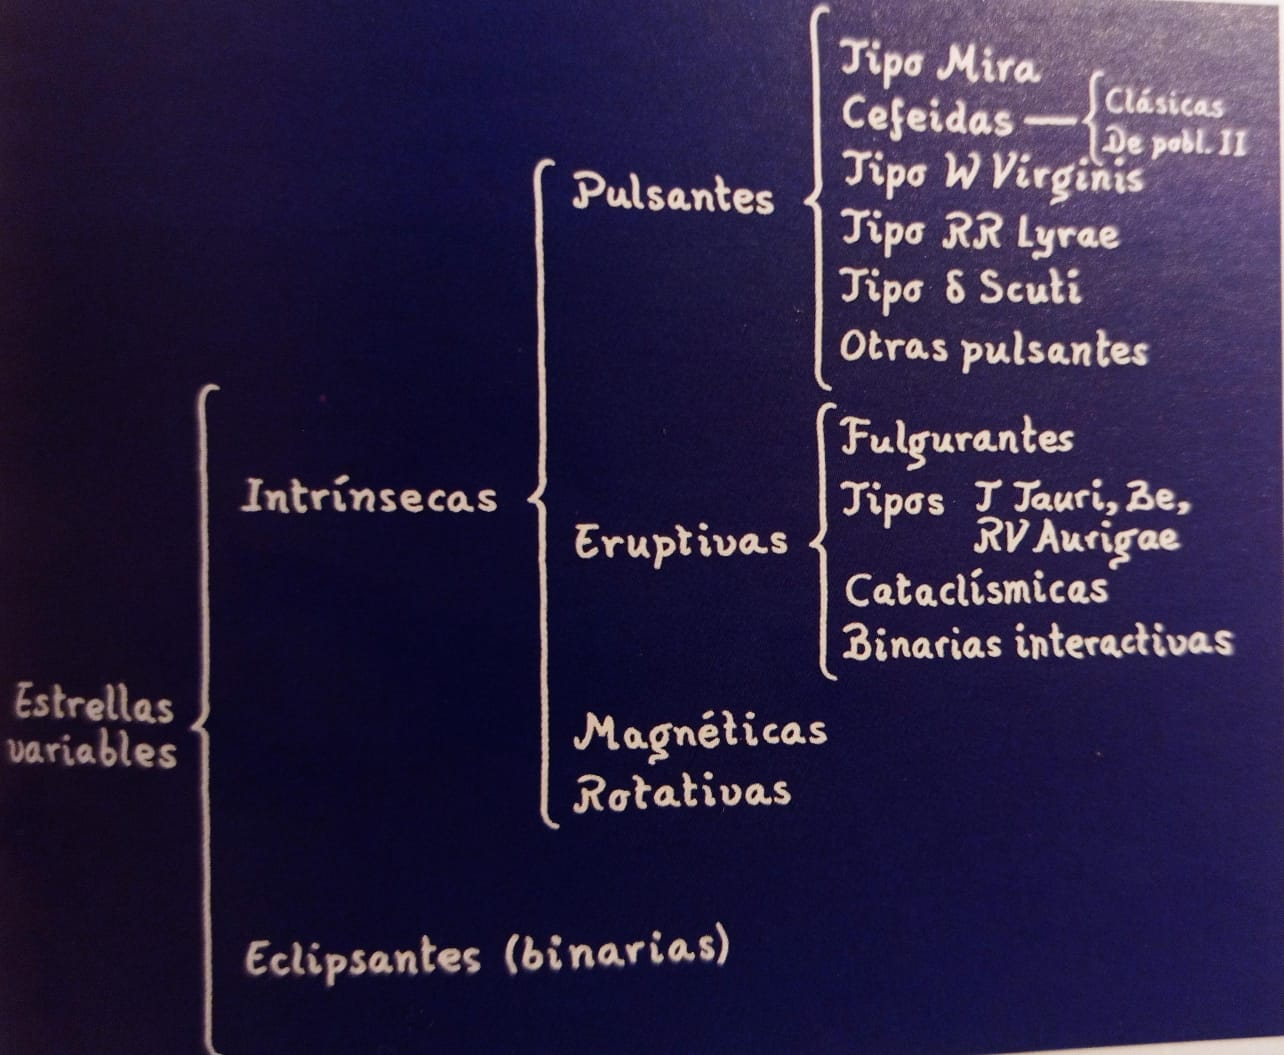

In [44]:
"""
Extracted from De la Tierra al Universo.
"""

from IPython.display import Image
Image(filename='star_types.jpg')

In [ ]:
!jupyter nbconvert *.ipynb --to html